# OSM 2018 Economics 
## Problem Set 4
### 07.16.2018 
### Yung-Hsu Tsui*
* I thank Jay-Hyung Kim and Zunda Xu for their precious comments.

## Exercise 1
### 1.5

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import scipy.optimize as opt

beta = 0.98
gamma = 2.5
alpha = 0.4
delta = 0.1
tau = 0.05
Kss = (((1/beta -1)/(1-tau) + delta)/alpha)**(1/(alpha-1))
print('The ss capital is : ',Kss)
Iss = delta*Kss
print('The ss investment is  is : ',Iss)
Yss = Kss**alpha
print('The ss output is : ',Yss)

The ss capital is :  7.287497950692988
The ss investment is  is :  0.7287497950692988
The ss output is :  2.213254613918843


In [2]:
def FOC_BM(ss_val,*args): 

    c = ss_val[0]
    k = ss_val[1]
    beta, gamma, alpha, delta, tau, zss  = args

    r = alpha*np.exp(zss) * (k**(alpha-1))
    
    res_1 = 1/(c**gamma) - beta * ((r-delta)*(1-tau)+1)/(c**gamma)  # Inter-temporal condition
    res_2 = c + k - (1-delta)*k - np.exp(zss) * (k**alpha) # resource constraint
    err = np.array([res_1,res_2])
    
    return err

beta = 0.98
gamma = 2.5
alpha = 0.4
delta = 0.1
tau = 0.05
zss = 0
parameter= (beta,gamma,alpha,delta,tau,zss)
results = opt.root(FOC_BM,np.array([1.4,7.2]),args=parameter)
results.x

array([1.48450482, 7.28749795])

### 1.6

In [3]:
def FOC_ENDO_LABOR(ss_val,*args): 

    c = ss_val[0]
    k = ss_val[1]
    l = ss_val[2]
    
    beta, gamma, alpha, delta, tau, zss, a, Xi  = args

    r = alpha* (k**(alpha-1) * (np.exp(zss)*l)**(1-alpha))
    w = (1-alpha)*np.exp(zss) * (k**alpha) * (l*np.exp(zss))**(-alpha)
    res_1 = 1/(c**gamma) - beta * ((r-delta)*(1-tau)+1)/(c**gamma) # Inter-temporal condition 
    res_2 = c + k - (1-delta)*k - (k**(alpha) * (np.exp(zss)*l)**(1-alpha))  #  Resource constraint
    res_3 = -a/((1-l)**Xi) + w*(1-tau)/(c**gamma) #  Intra-temporal condition
    err = np.array([res_1,res_2,res_3])
    
    return err

beta = 0.98
gamma = 1
alpha = 0.36
delta = 0.025
tau = 0
zss = 0
a = 1.0
Xi = 1
parameter = (beta, gamma, alpha, delta, tau, zss, a, Xi )
results = opt.root(FOC_ENDO_LABOR,np.array([1.0,3.2,0.3]),args=parameter)
css,kss,Lss = results.x
yss = kss**alpha * Lss**(1-alpha)
Iss = delta*kss

print('The ss investment is  is : ',Iss)
print('The ss output is : ',yss)
print(kss)


The ss investment is  is :  0.2819463793556164
The ss output is :  1.4225185806490854
11.277855174224655


In [4]:
beta = 0.98
gamma = 2
alpha = 0.36
delta = 0.025
tau = 0
zss = 0
a = 1.5
Xi = 1
parameter = (beta, gamma, alpha, delta, tau, zss, a, Xi )
results = opt.root(FOC_ENDO_LABOR,np.array([1.0,3.2,0.3]),args=parameter)
css,kss,Lss = results.x
yss = kss**alpha * Lss**(1-alpha)
Iss = delta*kss
rss = alpha * kss**(alpha-1) * Lss**(1-alpha) -delta
print('The ss investment is  is : ',Iss)
print('The ss output is : ',yss)
print(kss)
print(rss)
print(1-Lss)

The ss investment is  is :  0.2306711055888513
The ss output is :  1.163816802879473
9.226844223554052
0.020408163277219324
0.6368364062266403


In [5]:
results

    fjac: array([[-0.0048954 , -0.24502292,  0.96950493],
       [ 0.5996244 , -0.77660025, -0.1932424 ],
       [-0.80026659, -0.58039282, -0.15072349]])
     fun: array([-1.34077194e-11,  6.47328857e-11,  4.35012026e-11])
 message: 'The solution converged.'
    nfev: 16
     qtf: array([ 2.11504905e-10, -5.30583741e-10, -2.65805559e-10])
       r: array([-4.36122021,  0.08279974, -5.57799475,  0.00799523,  2.13885048,
        1.9412328 ])
  status: 1
 success: True
       x: array([0.9331457 , 9.22684422, 0.36316359])

## Exercise 2
### 2.1

In [6]:
import numpy as np
alpha = 0.4
beta = 0.98
rho = 0.95
sigma = 0.02
gamma = 2.5
zss = 0
kbar = (beta*alpha)**(1/(1-alpha))
# First, analytically solve the matrix blocks!
F = alpha* (kbar**(alpha-1))/(kbar**alpha - kbar)
G = - alpha * (kbar**(alpha-1))*(alpha + kbar**(alpha-1))/(kbar**alpha - kbar)
H = (alpha**2) * (kbar**(2*alpha-2))/(kbar**alpha - kbar)
L = - alpha * (kbar**(2*alpha - 1))/(kbar**alpha - kbar)
M = (alpha**2 * kbar**(2*alpha - 2))/(kbar**alpha - kbar)
N = rho
P = (-G -np.sqrt(G**2 - 4*F*H))/(2*F)
Q = -(L*N + M)/(F*N + F*P + G)
P

0.4

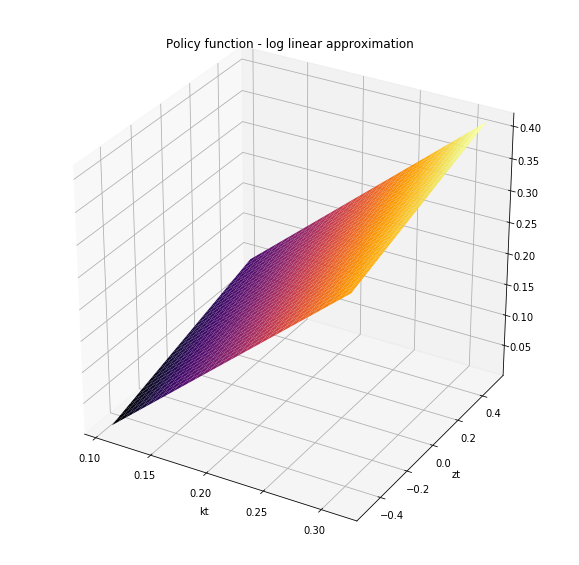

In [7]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

dom_k = np.linspace(kbar*0.5, kbar*1.5, 100)
dom_z = np.linspace(-0.5, 0.5, 100)

x, y = np.meshgrid(dom_k, dom_z)
kp = np.empty((100, 100))
for i in range(100):
    for j in range(100):
        kp[i,j] = kbar + P*(dom_k[i] - kbar) + Q*dom_z[j]
        
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(x, y, kp, rstride = 3, cstride = 3, cmap='inferno')
plt.title('Policy function - log linear approximation')
plt.ylabel('zt')
plt.xlabel('kt')
plt.show()

### 2.2

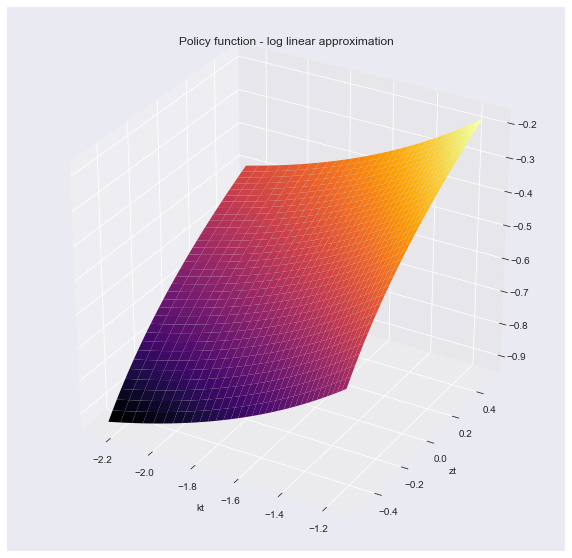

In [96]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

alpha = 0.4
beta = 0.98
rho = 0.95
sigma = 0.02
gamma = 2.5
zss = 0
kbar  = (beta*alpha)**(1/(1-alpha))
# First, analytically solve the matrix blocks!
F = alpha* (kbar**(alpha-1))/(kbar**alpha - kbar)
G = - alpha * (kbar**(alpha-1))*(alpha + kbar**(alpha-1))/(kbar**alpha - kbar)
H = (alpha**2) * (kbar**(2*alpha-2))/(kbar**alpha - kbar)
L = - alpha * (kbar**(2*alpha - 1))/(kbar**alpha - kbar)
M = (alpha**2 * kbar**(2*alpha - 2))/(kbar**alpha - kbar)
N = rho
P = (-G -np.sqrt(G**2 - 4*F*H))/(2*F)
Q = -(L*N + M)/(F*N + F*P + G)

dom_k1 = np.linspace(kbar*0.5, kbar*1.5, 100)
dom_k = np.log(dom_k1)
dom_z = np.linspace(-0.5, 0.5, 100)

x, y = np.meshgrid(dom_k, dom_z)
kp = np.empty((100, 100))
for i in range(100):
    for j in range(100):
        kp[i,j] = kbar + P*(dom_k[i] - kbar) + Q*dom_z[j]
        
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(x, y, kp, rstride = 3, cstride = 3, cmap='inferno')
plt.title('Policy function - log linear approximation')
plt.ylabel('zt')
plt.xlabel('kt')
plt.show()

### 2.4

In [98]:
import scipy.optimize as opt

def FOC_ENDO_LABOR(ss_val,*args): 

    c = ss_val[0]
    k = ss_val[1]
    l = ss_val[2]
    
    beta, gamma, alpha, delta, tau, zss, a, Xi  = args

    r = alpha* (k**(alpha-1) * (np.exp(zss)*l)**(1-alpha))
    w = (1-alpha)*np.exp(zss) * (k**alpha) * (l*np.exp(zss))**(-alpha)
    res_1 = 1/(c**gamma) - beta * ((r-delta)*(1-tau)+1)/(c**gamma) # Inter-temporal condition 
    res_2 = c + k - (1-delta)*k - (k**(alpha) * (np.exp(zss)*l)**(1-alpha))  #  Resource constraint
    res_3 = -a/((1-l)**Xi) + w*(1-tau)/(c**gamma) #  Intra-temporal condition
    err = np.array([res_1,res_2,res_3])
    
    return err

beta = 0.98
gamma = 2.5
alpha = 0.4
delta = 0.1
tau = 0.05
zss = 0
a = 0.5
Xi = 1.5
parameter = (beta, gamma, alpha, delta, tau, zss, a, Xi )
results = opt.root(FOC_ENDO_LABOR,np.array([1.0,3.2,0.3]),args=parameter)
css,kss,Lss = results.x
yss = kss**alpha * Lss**(1-alpha)
rss =  alpha*kss**(alpha-1) * Lss**(1-alpha)
wss = (1-alpha)* kss**alpha * Lss**(-alpha)
Iss = delta*kss
Tss = tau*(wss*Lss + (rss-delta)*kss)

print('The ss capital is : ', kss)
print('The ss c is : ', css)
print('The ss r is : ', rss)
print('The ss w is : ', wss)
print('The ss l is : ', Lss)
print('The ss output is : ',yss)
print('The ss investment is  is : ',Iss)

The ss capital is :  4.225229026782101
The ss c is :  0.8607032061542744
The ss r is :  0.12148227712140283
The ss w is :  1.327952768351102
The ss l is :  0.5797914531669861
The ss output is :  1.2832261088323458
The ss investment is  is :  0.4225229026782101


### 2.5

In [99]:
e_perturb = 1e-2
y = (kss, css, rss, wss, Lss,Tss,yss,Lss)
x = (beta, gamma, alpha, delta, tau, zss, a, Xi) 
dydx = np.zeros((8,8))

for i in range(0,8):
    for j in range(0,8):

        beta = 0.98 
        gamma = 2.5
        alpha = 0.4
        delta = 0.1
        tau = 0.05
        zss = 0
        a = 0.5
        Xi = 1.5
        
        xtilde = np.copy(x)
        
        if xtilde[i] == 0:
            xtilde[i] = e_perturb
        else:
            xtilde[i] = xtilde[i]*(1+e_perturb)
        
        xtilde = tuple(xtilde)
        
        results = opt.root(FOC_ENDO_LABOR,np.array([1.0,3.2,0.3]),args=xtilde)
        css1,kss1,Lss1 = results.x
        yss1 = kss1**alpha * Lss1**(1-alpha)
        rss1 =  alpha*kss1**(alpha-1) * Lss1**(1-alpha)
        wss1 = (1-alpha)* kss1**alpha * Lss1**(-alpha)
        Iss1 = delta*kss1
        Tss1 = tau*(wss1*Lss1 + (rss1-delta)*kss1)
        
        ytilde = np.array([kss1, css1, rss1, wss1, Lss1,Tss1,yss1,Lss1])
        dydx[i,j] = (ytilde[j]-y[j])/(xtilde[i]-x[i])

print('The ss capital is : ', kss1)
print('The ss c is : ', css1)
print('The ss r is : ', rss1)
print('The ss w is : ', wss1)
print('The ss l is : ', Lss1)
print('The ss output is : ',yss1)
print('The ss investment is  is : ',Iss1)

The ss capital is :  4.213257032503037
The ss c is :  0.8582644427649303
The ss r is :  0.12148227712137144
The ss w is :  1.3279527683513306
The ss l is :  0.5781486404537772
The ss output is :  1.2795901460152528
The ss investment is  is :  0.4213257032503037


### 2.6

In [44]:
#Library
import numpy as np
import scipy.optimize as opt
from __future__ import division
import scipy as sp
from numpy import hstack, vstack, zeros, dot, eye, kron
from scipy import linalg as la
from numpy import linalg as npla

#Functions
def Modeldefs(Xp, X, Y, Z, params):
    '''
    This function takes vectors of endogenous and exogenous state variables
    along with a vector of 'jump' variables and returns explicitly defined
    values for consumption, gdp, wages, real interest rates, and transfers
    
    Inputs are:
        Xp: value of capital in next period
        X: value of capital this period
        Y: value of labor this period
        Z: value of productivity this period
        params: list of parameter values
    
    Output are:
        Y: GDP
        w: wage rate
        r: rental rate on capital
        T: transfer payments
        c: consumption
        u: utiity
    '''
    
    # unpack input vectors
    kp = Xp
    k = X
    ell = Y
    z = Z
    
    # find definintion values
    Y = k**alpha*(np.exp(z)*ell)**(1-alpha)
    w = (1-alpha)*Y/ell
    r = alpha*Y/k
    c = (w*ell*(1-tau) + (r - delta)*k) + k - kp
    u = (c**(1-gamma) - 1)/(1-gamma) + chi*((1-ell)**(1-theta) -1)/(1-theta) # chi = a, theta = Xi
    return Y, w, r, c, u

def Modeldyn(theta0, params):
    '''
    This function takes vectors of endogenous and exogenous state variables
    along with a vector of 'jump' variables and returns values from the
    characterizing Euler equations.
    
    Inputs are:
        theta: a vector containng (Xpp, Xp, X, Yp, Y, Zp, Z) where:
            Xpp: value of capital in two periods
            Xp: value of capital in next period
            X: value of capital this period
            Yp: value of labor in next period
            Y: value of labor this period
            Zp: value of productivity in next period
            Z: value of productivity this period
        params: list of parameter values
    
    Output are:
        Euler: a vector of Euler equations written so that they are zero at the
            steady state values of X, Y & Z.  This is a 2x1 numpy array. 
    '''
    
    # unpack theat0
    (Xpp, Xp, X, Yp, Y, Zp, Z) = theta0
    
    # find definitions for now and next period
    Y, w, r, c, u = Modeldefs(Xp, X, Y, Z, params)
    Yp, wp, rp, cp, up = Modeldefs(Xpp, Xp, Yp, Zp, params)
    
    # Evaluate Euler equations
    ell = Y
    E1 = (c**(-gamma)*w*(1-tau)) / (chi*(1-ell)**(-theta)) - 1
    E2 = (c**(-gamma)) / (beta*cp**(-gamma)*(1 + rp - delta)) - 1
    
    
    return np.array([E1, E2])

def steady(XYbar, Zbar, funcname, param, nx, ny):
    Xbar = XYbar[0:nx]
    Ybar = XYbar[nx:nx+ny]
    Zbar = np.array(Zbar)
    if ny==0:
        In = np.concatenate((Xbar, Xbar, Xbar, Zbar, Zbar))
    else:
        In = np.concatenate((Xbar, Xbar, Xbar, Ybar, Ybar, Zbar, Zbar))
    In = np.concatenate((Xbar, Xbar, Xbar, Ybar, Ybar, Zbar, Zbar))
    Out = funcname(In, param)
    return Out


def LinApp_FindSS(funcname, param, guessXY, Zbar, nx, ny):
    '''
    Finds the steady state for a DSGE model numerically
    Parameters
    -----------
    funcname: function
    the name of the function which generates a column vector 
    from ny+nx dynamic equations.
        The ny equations to be linearized into the form below in the first 
        ny rows.
        A X(t) + B X(t-1) + C Y(t) + D Z(t) = 0 
        The function must be written so as to evaluate to zero for all rows
        in the steady state.
    param: array, dtype=float
        a vector of parameter values to be passed to funcname.
	
    guessXY: array, dtype=float
        guess for the steady state values of X and Y
	
    Zbar: array, dtype=float
        nz vector of Z steady state values
	
    nx: number, dtype=int
        number of X variables
	
    ny: number, dtype=int
        number of Y variables
    Returns
    --------
    XYbar: array, dtype=float
        1-by-(nx+ny) vector of X and Y steady state values, with the X
        values in positions 1 - nx and the Y values in nx+1 - nx+ny.
    '''
    
    f = lambda XYbar: steady(XYbar, Zbar, funcname, param, nx, ny)
    XYbar = opt.fsolve(f, guessXY)

    return XYbar

def LinApp_Deriv(funcname, param, theta0, nx, ny, nz, logX):
    """
    This function computes the matricies AA-MM in the log-linearization of
    the equations in the function 'func'.
    Parameters
    ----------
    func: function
        The function that generates a vector from the dynamic equations that are
        to be linearized. This must be written to evaluate to zero in the
        steady state. Often these equations are the Euler equations defining
        the model
    theta0: array, dtype=float
        A vector of steady state values for state parameters. Place the values
        of X in the front, then the Y values, followed by the Z's.
    nx: number, dtype=int
        The number of elements in X
    ny: number, dtype=nt
        The number of elements in Y
    nz: number, dtype=int
        The number of elements in Z
    logX: binary, dtype=int
        true if log-linearizing the X & Y variables, false for simple linearization
    Returns
    -------
    AA - MM : 2D-array, dtype=float:
        The equaitons described by Uhlig in the log-linearization.
    """
    # calculate of derivative matrix
    length = 3 * nx + 2 * (ny + nz)
    height = nx + ny
    
    # set vaue for epsilon
    # eps = 2.2E-16  # machine epsilon for double-precision
    eps = 10E-6

    # Constant term, T0, should be very close to zero if linearizing about SS
    T0 = funcname(theta0, param)  
    
    # set up plus and minus deviations matrices, disturb each input one-by-one
    devplus = np.tile(theta0.reshape(1, theta0.size), (length, 1))
    devminus = np.tile(theta0.reshape(1, theta0.size), (length, 1))
    for i in range(length):
        devplus[i, i] += eps
        devminus[i, i] -= eps
        
    # initialize first derivative  matrix
    dGammaMat = np.zeros((height,length))
    
    # find first derivatives
    for i in range(0,length):
        if i < 3 * nx + 2 * ny:
            if logX:
                dGammaMat[:,i] = \
                (theta0[i]*(funcname(devplus[i, :], param)-T0)/(1.0+T0) \
                - theta0[i]*(funcname(devminus[i, :], param)-T0)/(1.0+T0)) \
                / (2.0 * eps)
            else:
                dGammaMat[:,i] = \
                (funcname(devplus[i, :], param) \
                -funcname(devminus[i, :], param)) / (2.0 * eps)
        else:
            dGammaMat[:,i] = \
            (funcname(devplus[i, :], param) \
            -funcname(devminus[i, :], param)) / (2.0 * eps)

    # partition into parts as labeled by Uhlig
    AA = np.array(dGammaMat[0:ny, nx:2 * nx])
    BB = np.array(dGammaMat[0:ny, 2 * nx:3 * nx])
    CC = np.array(dGammaMat[0:ny, 3 * nx + ny:3 * nx + 2 * ny])
    DD = np.array(dGammaMat[0:ny, 3 * nx + 2 * ny + nz:length])
    FF = np.array(dGammaMat[ny:ny + nx, 0:nx])
    GG = np.array(dGammaMat[ny:ny + nx, nx:2 * nx])
    HH = np.array(dGammaMat[ny:ny + nx, 2 * nx:3 * nx])
    JJ = np.array(dGammaMat[ny:ny + nx, 3 * nx:3 * nx + ny])
    KK = np.array(dGammaMat[ny:ny + nx, 3 * nx + ny:3 * nx + 2 * ny])
    LL = np.array(dGammaMat[ny:ny + nx, 3 * nx + 2 * ny:3 * nx + 2 * ny + nz])
    MM = np.array(dGammaMat[ny:ny + nx, 3 * nx + 2 * ny + nz:length])

    return [AA, BB, CC, DD, FF, GG, HH, JJ, KK, LL, MM]

def _nullSpaceBasis(A):
    """
    This funciton will find the basis of the null space of the matrix A.
    Parameters
    ----------
    A : array_like, dtype=float
        The matrix you want the basis for
    Returns
    -------
    vecs : array_like, dtype=float
        A numpy matrix containing the vectors as row vectors.
    Notes
    -----
    If A is an empty matrix, an empty matrix is returned.
    """
    if A.any():
        U, s, Vh = la.svd(A)
        vecs = np.array([])
        toAppend = A.shape[1] - s.size
        s = np.append(s, zeros((1, toAppend)))
        for i in range(0, s.size):
            if s[i] == 0:
                vecs = Vh[-toAppend:, :]
        if vecs.size == 0:
            vecs = zeros((1, A.shape[1]))
        return np.mat(vecs)
    else:
        return zeros((0, 0))

def qzswitch(i, A, B, Q, Z):
    '''
    Takes U.T. matrices A, B, orthonormal matrices Q,Z, interchanges
    diagonal elements i and i+1 of both A and B, while maintaining 
    Q'AZ' and Q'BZ' unchanged.  Does nothing if ratios of diagonal elements
    in A and B at i and i+1 are the same.  Aborts if diagonal elements of
    both A and B are zero at either position.
    Parameters
    ----------
    i : number, dtype=int
        Index (>=1) of the diagonal element to be interchanged
    A : array_like, dtype=float
        The upper triangular matrix of which some diagonal elements are to
        be interchanged
    B : array_like, dtype=float
        The other upper triangular matrix of which some diagonal elements are
        to be interchanged
    Q : array_like, dtype=float
        An orthonormal matrix from the QZ decomposition
    Z : array_like, dtype=float
        An orthonormal matrix from the QZ decomposition
    Returns
    -------
    A : array_like, dtype=float
        Altered A matrix
    B : array_like, dtype=float
        Altered A matrix
    Q : array_like, dtype=float
        Altered Q matrix
    Z : array_like, dtype=float
        Altered Z matrix
    Notes
    -----
    Copyright: C.A. Sims, 1996, Yale University.
    '''
    a = A[i-1,i-1]
    d = B[i-1,i-1]
    b = A[i-1,i]
    e = B[i-1,i]
    c = A[i,i]
    f = B[i,i]
  
    wz = hstack((dot(c,e)-dot(f,b), (dot(c,d)-dot(f,a)).conj().T))
    xy = hstack(((dot(b,d)-dot(e,a)).conj().T, (dot(c,d)-dot(f,a)).conj().T))

    n = np.sqrt(dot(wz,wz.conj().T))
    m = np.sqrt(dot(xy,xy.conj().T))
    
    if n == 0:
        print ("qzswitch(): Inputs unchanged!")
        return A, B, Q, Z
    else:
       wz = wz/n
       xy = xy/m
       wz = vstack(( wz, hstack((-wz[1].conj().T, wz[0].conj().T)) ))
       xy = vstack(( xy, hstack((-xy[1].conj().T, xy[0].conj().T)) ))
       A[i-1:i+1,:] = xy.dot(A[i-1:i+1,:])
       B[i-1:i+1,:] = xy.dot(B[i-1:i+1,:])
       A[:,i-1:i+1] = A[:,i-1:i+1].dot(wz)
       B[:,i-1:i+1] = B[:,i-1:i+1].dot(wz)
       Z[:,i-1:i+1] = Z[:,i-1:i+1].dot(wz)
       Q[i-1:i+1,:] = xy.dot(Q[i-1:i+1,:])
    return A, B, Q, Z

def qzdiv(stake, A, B, Q, Z):
    '''
    Takes U.T. matrices A, B, orthonormal matrices Q,Z, rearranges them
    so that all cases of abs(B(i,i)/A(i,i))>stake are in lower right 
    corner, while preserving U.T. and orthonormal properties and Q'AZ' and Q'BZ'.
    
    Parameters
    ----------
    stake : number, dtype=float
    A : array_like, dtype=float
        An upper triangular matrix
    B : array_like, dtype=float
        An upper triangular matrix
    Q : array_like, dtype=float
        An orthonormal matrix from the QZ decomposition
    Z : array_like, dtype=float
        An orthonormal matrix from the QZ decomposition
    Returns
    -------
    A : array_like, dtype=float
        Rearranged A matrix
    B : array_like, dtype=float
        Rearranged B matrix
    Q : array_like, dtype=float
        Rearranged Q matrix
    Z : array_like, dtype=float
        Rearranged Z matrix
    Notes
    -----
    Copyright: C.A. Sims, 1996, Yale University.
    '''
    n, jnk = A.shape

    root = abs(vstack((np.diag(A), np.diag(B))).T)
    tmp = (root[:,0]<1.e-13).astype(int)
    root[:,0] = root[:,0]- tmp *(root[:,0]+root[:,1])
    root[:,1] = root[:,1]/root[:,0]
    for i in range(n,0,-1):
        m=0
        for j in range(i,0,-1):
            if (root[j-1,1] > stake or root[j-1,1] < -.1):
                m=j
                break
        if m==0:
            print ("qzdiv(): Inputs unchanged!")
            return A, B, Q, Z
        for k in range(m,i,1):
            A, B, Q, Z = qzswitch(k,A,B,Q,Z)
            tmp = root[k-1,1]
            root[k-1,1] = root[k,1]
            root[k,1] = tmp
    return A, B, Q, Z


def LinApp_Solve(AA, BB, CC, DD, FF, GG, HH, JJ, KK, LL, MM, NN, Z0, Sylv):
    """
    This code takes Uhlig's original code and puts it in the form of a
    function.  This version outputs the policy function coefficients: PP,
    QQ and UU for X, and RR, SS and VV for Y.
    Inputs overview:
    The matrices of derivatives: AA - TT.
    The autoregression coefficient matrix NN from the law of motion for Z.
    Z0 is the Z-point about which the linearization is taken.  For
    linearizing about the steady state this is Zbar and normally Zbar = 0.
    Sylv is an indicator variable telling the program to use the built-in
    function sylvester() to solve for QQ and SS, if possible.  Default is
    to use Sylv=1.
    Parameters
    ----------
    AA : array_like, dtype=float, shape=(ny, nx)
        The matrix represented above by :math:`A`. It is the matrix of
        derivatives of the Y equations with repsect to :math:`X_t`
    BB : array_like, dtype=float, shape=(ny, nx)
        The matrix represented above by :math:`B`. It is the matrix of
        derivatives of the Y equations with repsect to
        :math:`X_{t-1}`.
    CC : array_like, dtype=float, shape=(ny, ny)
        The matrix represented above by :math:`C`. It is the matrix of
        derivatives of the Y equations with repsect to :math:`Y_t`
    DD : array_like, dtype=float, shape=(ny, nz)
        The matrix represented above by :math:`C`. It is the matrix of
        derivatives of the Y equations with repsect to :math:`Z_t`
    FF : array_like, dtype=float, shape=(nx, nx)
        The matrix represetned above by :math:`F`. It is the matrix of
        derivatives of the model's characterizing equations with
        respect to :math:`X_{t+1}`
    GG : array_like, dtype=float, shape=(nx, nx)
        The matrix represetned above by :math:`G`. It is the matrix of
        derivatives of the model's characterizing equations with
        respect to :math:`X_t`
    HH : array_like, dtype=float, shape=(nx, nx)
        The matrix represetned above by :math:`H`. It is the matrix of
        derivatives of the model's characterizing equations with
        respect to :math:`X_{t-1}`
    JJ : array_like, dtype=float, shape=(nx, ny)
        The matrix represetned above by :math:`J`. It is the matrix of
        derivatives of the model's characterizing equations with
        respect to :math:`Y_{t+1}`
    KK : array_like, dtype=float, shape=(nx, ny)
        The matrix represetned above by :math:`K`. It is the matrix of
        derivatives of the model's characterizing equations with
        respect to :math:`Y_t`
    LL : array_like, dtype=float, shape=(nx, nz)
        The matrix represetned above by :math:`L`. It is the matrix of
        derivatives of the model's characterizing equations with
        respect to :math:`Z_{t+1}`
    MM : array_like, dtype=float, shape=(nx, nz)
        The matrix represetned above by :math:`M`. It is the matrix of
        derivatives of the model's characterizing equations with
        respect to :math:`Z_t`
    NN : array_like, dtype=float, shape=(nz, nz)
        The autocorrelation matrix for the exogenous state vector z.
    Z0 : array, dtype=float, shape=(nz,)
        the Z-point about which the linearization is taken.  For linearizing 
        about the steady state this is Zbar and normally Zbar = 0.
        QQ if true.
    Sylv: binary, dtype=int 
        an indicator variable telling the program to use the built-in
        function sylvester() to solve for QQ and SS, if possible.  Default is
        to use Sylv=1.
    Returns
    -------
    P : 2D-array, dtype=float, shape=(nx, nx)
        The matrix :math:`P` in the law of motion for endogenous state
        variables described above.
    Q : 2D-array, dtype=float, shape=(nx, nz)
        The matrix :math:`Q` in the law of motion for exogenous state
        variables described above.
    R : 2D-array, dtype=float, shape=(ny, nx)
        The matrix :math:`R` in the law of motion for endogenous state
        variables described above.
    S : 2D-array, dtype=float, shape=(ny, nz)
        The matrix :math:`S` in the law of motion for exogenous state
        variables described above.
        
    References
    ----------
    .. [1] Uhlig, H. (1999): "A toolkit for analyzing nonlinear dynamic
       stochastic models easily," in Computational Methods for the Study
       of Dynamic Economies, ed. by R. Marimon, pp. 30-61. Oxford
       University Press.
    """
    #The original coding we did used the np.matrix form for our matrices so we
    #make sure to set our inputs to numpy matrices.
    AA = np.matrix(AA)
    BB = np.matrix(BB)
    CC = np.matrix(CC)
    DD = np.matrix(DD)
    FF = np.matrix(FF)
    GG = np.matrix(GG)
    HH = np.matrix(HH)
    JJ = np.matrix(JJ)
    KK = np.matrix(KK)
    LL = np.matrix(LL)
    MM = np.matrix(MM)
    NN = np.matrix(NN)
    Z0 = np.array(Z0)
    #Tolerance level to use
    TOL = .000001

    # Here we use matrices to get pertinent dimensions.
    nx = FF.shape[1]
    l_equ = CC.shape[0]
    ny = CC.shape[1]
    nz = min(NN.shape)

    # The following if and else blocks form the
    # Psi, Gamma, Theta Xi, Delta mats
    if l_equ == 0:
        if CC.any():
            # This blcok makes sure you don't throw an error with an empty CC.
            CC_plus = la.pinv(CC)
            CC_0 = _nullSpaceBasis(CC.T)
        else:
            CC_plus = np.mat([])
            CC_0 = np.mat([])
        Psi_mat = FF
        Gamma_mat = -GG
        Theta_mat = -HH
        Xi_mat = np.mat(vstack((hstack((Gamma_mat, Theta_mat)),
                        hstack((eye(nx), zeros((nx, nx)))))))
        Delta_mat = np.mat(vstack((hstack((Psi_mat, zeros((nx, nx)))),
                           hstack((zeros((nx, nx)), eye(nx))))))

    else:
        CC_plus = la.pinv(CC)
        CC_0 = _nullSpaceBasis(CC.T)
        if l_equ != ny:
            Psi_mat = vstack((zeros((l_equ - ny, nx)), FF \
                            - dot(dot(JJ, CC_plus), AA)))
            Gamma_mat = vstack((dot(CC_0, AA), dot(dot(JJ, CC_plus), BB) \
                        - GG + dot(dot(KK, CC_plus), AA)))
            Theta_mat = vstack((dot(CC_0, BB), dot(dot(KK, CC_plus), BB) - HH))
        else:
            CC_inv = la.inv(CC)
            Psi_mat = FF - dot(JJ.dot(CC_inv), AA)
            Gamma_mat = dot(JJ.dot(CC_inv), BB) - GG + dot(dot(KK, CC_inv), AA)
            Theta_mat = dot(KK.dot(CC_inv), BB) - HH
        Xi_mat = vstack((hstack((Gamma_mat, Theta_mat)), \
                            hstack((eye(nx), zeros((nx, nx))))))
        Delta_mat = vstack((hstack((Psi_mat, np.mat(zeros((nx, nx))))),\
                                hstack((zeros((nx, nx)), eye(nx)))))

    # Now we need the generalized eigenvalues/vectors for Xi with respect to
    # Delta. That is eVals and eVecs below.

    eVals, eVecs = la.eig(Xi_mat, Delta_mat)
    if npla.matrix_rank(eVecs) < nx:
        print("Error: Xi is not diagonalizable, stopping...")

    # From here to line 158 we Diagonalize Xi, form Lambda/Omega and find P.
    else:
        Xi_sortabs = np.sort(abs(eVals))
        Xi_sortindex = np.argsort(abs(eVals))
        Xi_sortedVec = np.array([eVecs[:, i] for i in Xi_sortindex]).T
        Xi_sortval = eVals[Xi_sortindex]
        Xi_select = np.arange(0, nx)
        if np.imag(Xi_sortval[nx - 1]).any():
            if (abs(Xi_sortval[nx - 1] - sp.conj(Xi_sortval[nx])) < TOL):
                drop_index = 1
                cond_1 = (abs(np.imag(Xi_sortval[drop_index-1])) > TOL)
                cond_2 = drop_index < nx
                while cond_1 and cond_2:
                    drop_index += 1
                if drop_index >= nx:
                    print("There is an error. Too many complex eigenvalues."
                          +" Quitting...")
                else:
                    print("Droping the lowest real eigenvalue. Beware of" +
                          " sunspots!")
                    Xi_select = np.array([np.arange(0, drop_index - 1),\
                                          np.arange(drop_index, nx + 1)])
        # Here Uhlig computes stuff if user chose "Manual roots" I skip it.
        if max(abs(Xi_sortval[Xi_select])) > 1 + TOL:
            print("It looks like we have unstable roots. This might not work...")
        if abs(max(abs(Xi_sortval[Xi_select])) - 1) < TOL:
            print("Check the model to make sure you have a unique steady" +
                  " state we are having problems with convergence.")
        Lambda_mat = np.diag(Xi_sortval[Xi_select])
        Omega_mat = Xi_sortedVec[nx:2 * nx, Xi_select]

        if npla.matrix_rank(Omega_mat) < nx:
            print("Omega matrix is not invertible, Can't solve for P; we" +
                    " proceed with QZ-method instead.")

            #~~~~~~~~~ QZ-method codes from SOLVE_QZ ~~~~~~~~#
            Delta_up,Xi_up,UUU,VVV=la.qz(Delta_mat,Xi_mat, output='complex')
            UUU=UUU.T
            Xi_eigval = np.diag( np.diag(Xi_up)/np.maximum(np.diag(Delta_up),TOL))
            Xi_sortabs= np.sort(abs(np.diag(Xi_eigval)))
            Xi_sortindex= np.argsort(abs(np.diag(Xi_eigval)))
            Xi_sortval = Xi_eigval[Xi_sortindex, Xi_sortindex]
            Xi_select = np.arange(0, nx)
            stake = max(abs(Xi_sortval[Xi_select])) + TOL

            Delta_up, Xi_up, UUU, VVV = qzdiv(stake,Delta_up,Xi_up,UUU,VVV)
                    
            #Check conditions from line 49-109
            if np.imag(Xi_sortval[nx - 1]).any():
                if (abs(Xi_sortval[nx - 1] - sp.conj(Xi_sortval[nx])) < TOL):
                    print("Problem: You have complex eigenvalues! And this means"+
                        " PP matrix will contain complex numbers by this method." )
                drop_index = 1
                cond_1 = (abs(np.imag(Xi_sortval[drop_index-1])) > TOL)
                cond_2 = drop_index < nx
                while cond_1 and cond_2:
                    drop_index += 1
                if drop_index >= nx:
                    print("There is an error. Too many complex eigenvalues."
                              +" Quitting...")
                else:
                    print("Dropping the lowest real eigenvalue. Beware of" +
                          " sunspots!")
                    for i in range(drop_index,nx+1):
                        Delta_up,Xi_up,UUU,VVV = qzswitch(i,Delta_up,Xi_up,UUU,VVV)
                    Xi_select1 = np.arange(0,drop_index-1)
                    Xi_select = np.append(Xi_select1, np.arange(drop_index,nx+1))

            if Xi_sortval[max(Xi_select)] < 1 - TOL:
                print('There are stable roots NOT used. Proceeding with the' +
                        ' smallest root.')
            if max(abs(Xi_sortval[Xi_select])) > 1 + TOL:
                print("It looks like we have unstable roots. This might not work...")
            if abs(max(abs(Xi_sortval[Xi_select])) - 1) < TOL:
                print("Check the model to make sure you have a unique steady" +
                          " state we are having problems with convergence.")
            #End of checking conditions
            #Lambda_mat = np.diag(Xi_sortval[Xi_select]) # to help sol_out.m
            
            VVV=VVV.conj().T
            VVV_2_1 = VVV[nx : 2*nx, 0 : nx]
            VVV_2_2 = VVV[nx : 2*nx, nx :2*nx]
            UUU_2_1 = UUU[nx : 2*nx, 0 : nx]
            VVV = VVV.conj().T
            
            if abs(la.det(UUU_2_1))< TOL:
                print("One necessary condition for computing P is NOT satisfied,"+
                    " but we proceed anyways...")
            if abs(la.det(VVV_2_1))< TOL:
                print("VVV_2_1 matrix, used to compute for P, is not invertible; we"+
                    " are in trouble but we proceed anyways...")
            
            PP = np.matrix( la.solve(- VVV_2_1, VVV_2_2) )
            PP_imag = np.imag(PP)
            PP = np.real(PP)
            if (sum(sum(abs(PP_imag))) / sum(sum(abs(PP))) > .000001).any():
                print("A lot of P is complex. We will continue with the" +
                      " real part and hope we don't lose too much information.")
            #~~~~~~~~~ End of QZ-method ~~~~~~~~~#

        #This follows the original uhlig.py file
        else:
            PP = dot(dot(Omega_mat, Lambda_mat), la.inv(Omega_mat))
            PP_imag = np.imag(PP)
            PP = np.real(PP)
            if (sum(sum(abs(PP_imag))) / sum(sum(abs(PP))) > .000001).any():
                print("A lot of P is complex. We will continue with the" +
                      " real part and hope we don't lose too much information.")
    # The code from here to the end was from he Uhlig file calc_qrs.m.
    # I think for python it fits better here than in a separate file.

    # The if and else below make RR and VV depending on our model's setup.
    if l_equ == 0:
        RR = zeros((0, nx))
        VV = hstack((kron(NN.T, FF) + kron(eye(nz), \
            (dot(FF, PP) + GG)), kron(NN.T, JJ) + kron(eye(nz), KK))) 

    else:
        RR = - dot(CC_plus, (dot(AA, PP) + BB))
        VV = sp.vstack((hstack((kron(eye(nz), AA), \
                        kron(eye(nz), CC))), hstack((kron(NN.T, FF) +\
                        kron(eye(nz), dot(FF, PP) + dot(JJ, RR) + GG),\
                        kron(NN.T, JJ) + kron(eye(nz), KK)))))

    # Now we use LL, NN, RR, VV to get the QQ, RR, SS, VV matrices.
    # first try using Sylvester equation solver
    if Sylv:
        if ny>0:
            PM = (FF-la.solve(JJ.dot(CC),AA))
            if npla.matrix_rank(PM)< nx+ny:
                Sylv=0
                print("Sylvester equation solver condition is not satisfied;"\
                        +" proceed with the original method...")
        else:
            if npla.matrix_rank(FF)< nx:
                Sylv=0
                print("Sylvester equation solver condition is not satisfied;"\
                        +" proceed with the original method...")
        print("Using Sylvester equation solver...")
        if ny>0:
            Anew = la.solve(PM, (FF.dot(PP)+GG+JJ.dot(RR)-\
                    la.solve(KK.dot(CC), AA)) )
            Bnew = NN
            Cnew1 = la.solve(JJ.dot(CC),DD.dot(NN))+la.solve(KK.dot(CC), DD)-\
                    LL.dot(NN)-MM
            Cnew = la.solve(PM, Cnew1)
            QQ = la.solve_sylvester(Anew,Bnew,Cnew)
            SS = la.solve(-CC, (AA.dot(QQ)+DD))
        else:
            Anew = la.solve(FF, (FF.dot(PP)+GG))
            Bnew = NN
            Cnew = la.solve(FF, (-LL.dot(NN)-MM))
            QQ = la.solve_sylvester(Anew,Bnew,Cnew)
            SS = np.zeros((0,nz)) #empty matrix
    
    # then the Uhlig's way
    else:
        '''
        # This code is from Spencer Lypn's 2012 version
        q_eqns = sp.shape(FF)[0]
        m_states = sp.shape(FF)[1]
        l_equ = sp.shape(CC)[0]
        n_endog = sp.shape(CC)[1]
        k_exog = min(sp.shape(sp.mat(NN))[0], sp.shape(sp.mat(NN))[1])
        sp.mat(LL.T)
        sp.mat(NN)
        sp.dot(sp.mat(LL),sp.mat(NN))
        LLNN_plus_MM = sp.dot(sp.mat(LL),sp.mat(NN)) + sp.mat(MM.T)
        QQSS_vec = sp.dot(la.inv(sp.mat(VV)), sp.mat(LLNN_plus_MM))
        QQSS_vec = -QQSS_vec
        if max(abs(QQSS_vec)) == sp.inf:
            print("We have issues with Q and S. Entries are undefined. Probably because V is no inverible.")
        
        QQ = sp.reshape(QQSS_vec[0:m_states*k_exog],(m_states,k_exog))
        SS = sp.reshape(QQSS_vec[(m_states*k_exog):((m_states+n_endog)*k_exog)],(n_endog,k_exog))
        
        # The vstack and hstack's below are ugly, but safe. If you have issues with WW uncomment the first definition and comment out the second one.
        #WW = sp.vstack((\
        #sp.hstack((sp.eye(m_states), sp.zeros((m_states,k_exog)))),\
        #sp.hstack((sp.dot(RR,sp.pinv(PP)), (SS-sp.dot(sp.dot(RR,sp.pinv(PP)),QQ)))),\
        #sp.hstack((sp.zeros((k_exog,m_states)),sp.eye(k_exog)))))
        
        WW = sp.array([[sp.eye(m_states), sp.zeros((m_states,k_exog))],\
        [sp.dot(RR,la.pinv(PP)), (SS-sp.dot(sp.dot(RR,la.pinv(PP)),QQ))],\
        [sp.zeros((k_exog,m_states)),sp.eye(k_exog)]])
    
        '''
        
        # this code is from Yulong Li's 2015 version
        if (npla.matrix_rank(VV) < nz * (nx + ny)):
            print("Sorry but V is not invertible. Can't solve for Q and S;"+
                     " but we proceed anyways...")
        
        LL = sp.mat(LL)
        NN = sp.mat(NN)
        LLNN_plus_MM = dot(LL, NN) + MM

        if ny>0:
            impvec = vstack([DD, LLNN_plus_MM])
        else:
            impvec = LLNN_plus_MM

        impvec = np.reshape(impvec, ((nx + ny) * nz, 1), 'F')
        
        QQSS_vec = np.matrix(la.solve(-VV, impvec))

        if (max(abs(QQSS_vec)) == sp.inf).any():
            print("We have issues with Q and S. Entries are undefined." +
                      " Probably because V is no inverible.")

        #Build QQ SS
        QQ = np.reshape(np.matrix(QQSS_vec[0:nx * nz, 0]),
                            (nx, nz), 'F')

        SS = np.reshape(QQSS_vec[(nx * nz):((nx + ny) * nz), 0],\
                            (ny, nz), 'F')
        

    return np.array(PP), np.array(QQ), np.array(RR), np.array(SS)

def FOC_ENDO_LABOR(ss_val,*args): 

    c = ss_val[0]
    k = ss_val[1]
    l = ss_val[2]
    
    alpha, beta, gamma, delta, chi, theta, rho,tau ,sigma  = args

    r = alpha* (k**(alpha-1) * (np.exp(zss)*l)**(1-alpha))
    w = (1-alpha)*np.exp(zss) * (k**alpha) * (l*np.exp(zss))**(-alpha)
    res_1 = 1/(c**gamma) - beta * ((r-delta)+1)/(c**gamma) # Inter-temporal condition 
    res_2 = c + k - (1-delta)*k - (k**(alpha) * (np.exp(zss)*l)**(1-alpha))  #  Resource constraint
    res_3 = -chi/((1-l)**theta) + w*(1-tau)/(c**gamma) #  Intra-temporal condition
    err = np.array([res_1,res_2,res_3])
    
    return err

In [45]:
## Step 0 : Define parameters

alpha = .40
beta = .98
gamma = 2.5
delta = 0.1
chi = 0.5
theta = 1.5
rho = .9
sigma = .02
tau = 0.05
zss = 0
# make parameter list to pass to functions
params = (alpha, beta, gamma, delta, chi, theta, rho,tau ,sigma)

# set LinApp parameters
Zbar = np.array([0.])
nx = 1
ny = 1
nz = 1
logX = 0
Sylv = 0


## Step 1 : Find the steady-state capital and labor in the economy

# take a guess for steady state values of k and ell
guessXY = np.array([.1, .25])

# find the steady state values using LinApp_FindSS
XYbar = LinApp_FindSS(Modeldyn, params, guessXY, Zbar, nx, ny)
(kbar, ellbar) = XYbar
print ('XYbar: ', XYbar)

# set up steady state input vector
theta0 = np.array([kbar, kbar, kbar, ellbar, ellbar, 0., 0.])

# check SS solution
check = Modeldyn(theta0, params)
print ('check: ', check)
if np.max(np.abs(check)) > 1.E-6:
    print ('Have NOT found steady state')
    
Ybar, wbar, rbar, cbar, ubar = Modeldefs(kbar, kbar, ellbar, 0, params)
print ('Ybar: ', Ybar)
print ('wbar: ', wbar)
print ('rbar: ', rbar)
print ('cbar: ', cbar)
print ('ubar: ', ubar)    

## Step 2 : Retrieve the matrices blocks using the steady-state values.

# find the derivatives matrices
[AA, BB, CC, DD, FF, GG, HH, JJ, KK, LL, MM] = LinApp_Deriv(Modeldyn, params, theta0, nx, ny, nz, logX)
print('FF: ', FF)
print('GG: ', GG)
print('HH: ', HH)
print('LL: ', LL)
print('MM: ', MM)

# set value for NN    
NN = rho
    
# find the policy and jump function coefficients
PP, QQ, RR, SS = LinApp_Solve(AA,BB,CC,DD,FF,GG,HH,JJ,KK,LL,MM,NN,Zbar,Sylv)
print ('PP:',PP)
print ('QQ', QQ)
print ('RR:',RR)
print ('SS', SS)

XYbar:  [2.71811802 0.36750355]
check:  [4.05921963e-11 2.26485497e-14]
Ybar:  0.8182089955947389
wbar:  1.335838502506985
rbar:  0.12040816326528347
cbar:  0.5218509238004576
ubar:  -1.359160907165972
FF:  [[-4.79064017]]
GG:  [[9.687791]]
HH:  [[-4.87110338]]
LL:  [[2.21049152]]
MM:  [[-2.28129152]]
PP: [[0.84912777]]
QQ [[0.07755153]]
RR: [[-0.09005176]]
SS [[-0.2926318]]


In [46]:
print(kbar)
print(ellbar)

2.71811801926439
0.3675035540864539


In [61]:
alpha = .40
beta = .98
gamma = 2.5
delta = 0.1
chi = 0.5
theta = 1.5
rho = .9
sigma = .02
tau = 0.05
zss = 0
# make parameter list to pass to functions
params = (alpha, beta, gamma, delta, chi, theta, rho,tau ,sigma)

parameter = (alpha, beta, gamma, delta, chi, theta, rho,tau ,sigma )
results = opt.root(FOC_ENDO_LABOR,np.array([1.0,3.2,0.3]),args=params)
results.x

array([0.86241717, 4.29019708, 0.58005674])

### 2.7

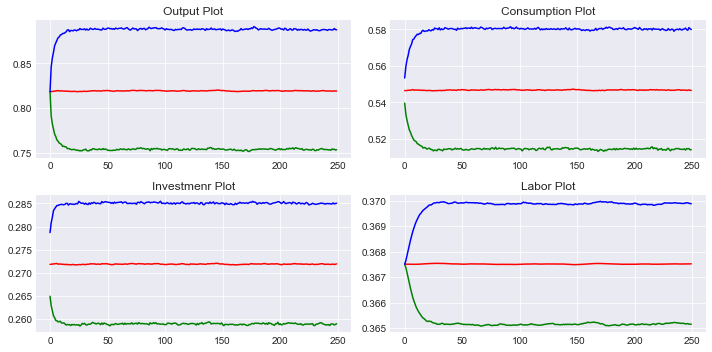

In [68]:
#Functions

def get_c(w, r, kp, k, l):
    c = w * l + (r - delta) * k + k - kp
    return c

def get_r(k, l, z):
    r = alpha * (l/k) ** (1 - alpha) * (np.exp(z)) ** (1 - alpha)
    return r

def get_w(k, l, z):
    w = (1 - alpha) * (k/l) ** alpha * (np.exp(z)) ** (1 - alpha)
    return w

#generate time series
sigmaz = 0.02
e = np.random.normal(0, scale=sigmaz, size=(10000, 251))

z = np.zeros_like(e)
z[:, 0] = np.zeros(10000)
for i in range(1, 251):
    z[:, i] = rho * z[:, i - 1] + e[:, i]

k = np.zeros_like(e)
l = np.zeros_like(e)
c = np.zeros_like(e)
y = np.zeros_like(e)
I = np.zeros_like(e)


for i in range(1, 251):
    k[:, i] = PP[0, 0] * k[:, i - 1] + QQ[0, 0] * z[:, i] 
    l[:, i] = -0.1919 * k[:, i - 1] + -0.0113 * z[:, i]
k = kbar * np.exp(k)
l = ellbar * np.exp(l)

w = get_w(k, l, z)
r = get_r(k, l, z)

for i in range(250):
    y[:, i] = k[:, i] ** alpha * l[:, i] ** (1 - alpha) * np.exp(z[:, i])
    I[:, i] = k[:, i + 1] - (1 - delta) * k[:, i]
    c[:, i] = w[:, i] * l[:, i] + (r[:, i] - delta) * k[:, i] + k[:, i] - k[:, i+1]
y = y[:, 0:250]
I = I[:, 0:250]
c = c[:, 0:250]
l = l[:, 0:250]
ymean = y.mean(axis=0)
cmean = c.mean(axis=0)
Imean = I.mean(axis=0)
lmean = l.mean(axis=0)

ymin = np.zeros(250)
ymax = np.zeros(250)
cmin = np.zeros(250)
cmax = np.zeros(250)
Imin = np.zeros(250)
Imax = np.zeros(250)
lmin = np.zeros(250)
lmax = np.zeros(250)
for i in range(250):
    ymin[i] = np.percentile(y[:, i], 5)
    ymax[i] = np.percentile(y[:, i], 95)
    cmin[i] = np.percentile(c[:, i], 5)
    cmax[i] = np.percentile(c[:, i], 95)
    Imin[i] = np.percentile(I[:, i], 5)
    Imax[i] = np.percentile(I[:, i], 95)
    lmin[i] = np.percentile(l[:, i], 5)
    lmax[i] = np.percentile(l[:, i], 95)

import pylab
pylab.rcParams['figure.figsize'] = (10, 5)
plt.subplot(221)
plt.plot(np.arange(0, 250), ymean[0: 250], c='r')
plt.plot(np.arange(0, 250), ymin, c ='g')
plt.plot(np.arange(0, 250), ymax, c ='b')
plt.title("Output Plot")
plt.subplot(222)
plt.plot(np.arange(0, 250), cmean[0: 250], c='r')
plt.plot(np.arange(0, 250), cmin, c ='g')
plt.plot(np.arange(0, 250), cmax, c ='b')
plt.title("Consumption Plot")
plt.subplot(223)
plt.plot(np.arange(0, 250), Imean[0: 250], c='r')
plt.plot(np.arange(0, 250), Imin, c ='g')
plt.plot(np.arange(0, 250), Imax, c ='b')
plt.title("Investmenr Plot")
plt.subplot(224)
plt.plot(np.arange(0, 250), lmean[0: 250], c='r')
plt.plot(np.arange(0, 250), lmin, c ='g')
plt.plot(np.arange(0, 250), lmax, c ='b')
plt.title("Labor Plot")
plt.tight_layout()
plt.show()

### 2.8

In [70]:
from scipy import stats
ymean1 = y.mean(axis=1).mean()
cmean1 = c.mean(axis=1).mean()
Imean1 = I.mean(axis=1).mean()
lmean1 = l.mean(axis=1).mean()

ystd1 = y.std(axis=1).mean()
cstd1 = c.std(axis=1).mean()
Istd1 = I.std(axis=1).mean()
lstd1 = l.std(axis=1).mean()

ycv1 = (y.mean(axis=1)/y.std(axis=1)).mean()
ccv1 = (c.mean(axis=1)/c.std(axis=1)).mean()
Icv1 = (I.mean(axis=1)/I.std(axis=1)).mean()
lcv1 = (l.mean(axis=1)/l.std(axis=1)).mean()

crv1 = (c.std(axis=1)/y.std(axis=1)).mean()
Irv1 = (I.std(axis=1)/y.std(axis=1)).mean()
lrv1 = (l.std(axis=1)/y.std(axis=1)).mean()

ymean2 = stats.sem(y.mean(axis=1))
cmean2 = stats.sem(c.mean(axis=1))
Imean2 = stats.sem(I.mean(axis=1))
lmean2 = stats.sem(l.mean(axis=1))

ystd2 = stats.sem(y.std(axis=1))
cstd2 = stats.sem(c.std(axis=1))
Istd2 = stats.sem(I.std(axis=1))
lstd2 = stats.sem(l.std(axis=1))

ycv2 = stats.sem((y.mean(axis=1)/y.std(axis=1)))
ccv2 = stats.sem((c.mean(axis=1)/c.std(axis=1)))
Icv2 = stats.sem((I.mean(axis=1)/I.std(axis=1)))
lcv2 = stats.sem((l.mean(axis=1)/l.std(axis=1)))

crv2 = stats.sem((c.std(axis=1)/y.std(axis=1)))
Irv2 = stats.sem((I.std(axis=1)/y.std(axis=1)))
lrv2 = stats.sem((l.std(axis=1)/y.std(axis=1)))

yp = np.zeros(10000-1)
cp = np.zeros(10000-1)
Ip = np.zeros(10000-1)
lp = np.zeros(10000-1)

cc = np.zeros(10000)
Ic = np.zeros(10000)
lc = np.zeros(10000)
    
for i in range(10000):
    cc[i] = np.corrcoef(y[i, :], c[i, :])[0, 1]
    Ic[i] = np.corrcoef(y[i, :], I[i, :])[0, 1]
    lc[i] = np.corrcoef(y[i, :], l[i, :])[0, 1]

cc1 = cc.mean()
Ic1 = Ic.mean()
lc1 = lc.mean()
cc2 = stats.sem(cc)
Ic2 = stats.sem(Ic)
lc2 = stats.sem(lc)

for i in range(10000-1):
    yp[i] = np.corrcoef(y[i, :-1], y[i, 1:])[0, 1] 
    cp[i] = np.corrcoef(y[i, :-1], c[i, 1:])[0, 1] 
    Ip[i] = np.corrcoef(y[i, :-1], I[i, 1:])[0, 1] 
    lp[i] = np.corrcoef(y[i, :-1], l[i, 1:])[0, 1] 

yp1 = yp.mean()
cp1 = cp.mean()
Ip1 = Ip.mean()
lp1 = lp.mean()
yp2 = stats.sem(yp)
cp2 = stats.sem(cp)
Ip2 = stats.sem(Ip)
lp2 = stats.sem(lp)

In [71]:
print("In the order of GDP, Consumption, Investment, Labor")
print(str(ymean1)+"  "+str(ymean2))
print(str(cmean1)+"  "+str(cmean2))
print(str(Imean1)+"  "+str(Imean2))
print(str(lmean1)+"  "+str(lmean2))
print("")
print("volatility")
print(str(ystd1)+"  "+str(ystd2))
print(str(cstd1)+"  "+str(cstd2))
print(str(Istd1)+"  "+str(Istd2))
print(str(lstd1)+"  "+str(lstd2))
print("")
print("Coefficient of Variation")
print(str(ycv1)+"  "+str(ycv2))
print(str(ccv1)+"  "+str(ccv2))
print(str(Icv1)+"  "+str(Icv2))
print(str(lcv1)+"  "+str(lcv2))
print("")
print("Relative volatility")
print(str(crv1)+"  "+str(crv2))
print(str(Irv1)+"  "+str(Irv2))
print(str(lrv1)+"  "+str(lrv2))
print("")
print("Persistence")
print(str(yp1)+"  "+str(yp2))
print(str(cp1)+"  "+str(cp2))
print(str(Ip1)+"  "+str(Ip2))
print(str(lp1)+"  "+str(lp2))
print("")
print("Cyclicality")
print(str(cc1)+"  "+str(cc2))
print(str(Ic1)+"  "+str(Ic2))
print(str(lc1)+"  "+str(lc2))

In the order of GDP, Consumption, Investment, Labor
0.8191196173942237  0.00011371974177186028
0.546709536057862  5.645545906790354e-05
0.2718434216097047  1.7263083655856687e-05
0.36750998605165675  4.859503059176766e-06

volatility
0.038531112559837245  5.526389102420487e-05
0.018828656057886504  2.634972290772774e-05
0.007696858701627345  8.39855225498291e-06
0.001297519698904433  2.5779952667823257e-06

Coefficient of Variation
21.690209605309295  0.030831553484352455
29.59505120048131  0.04079708510326903
35.73797781975419  0.03893734610895885
294.78120389773704  0.604223396316197

Relative volatility
0.4889610882961168  5.8998534581489786e-05
0.20082528608631806  9.338904779661046e-05
0.03343678567457192  2.3423585492459588e-05

Persistence
0.8954131568661019  0.0002970603080773007
0.8970195138263373  0.00030351890363561676
0.6605942564450171  0.0006466671539453088
-0.8642549713806591  0.0002939088640541335

Cyclicality
0.9636094092293158  8.040586650982746e-05
0.7993320394426862

### 2.9

In [74]:
# Generate impulse response function
# The rows of the matrix correspond to z, k, l, y, i, c, in that order
shock = np.zeros((6, 41))

k = np.zeros_like(41)
shock[0, 0]=0
shock[1, 0]=0
shock[2, 0]=0

for i in range(1, 41):
    shock[0, i] = rho ** i * sigmaz
    shock[1, i] = PP[0, 0] * shock[1, i - 1] + QQ[0, 0] * shock[0, i] #log capital
    shock[2, i] = -0.1919 * shock[1, i - 1] + -0.0113 * shock[0, i] #log labor
shock[1, :] = kbar * np.exp(shock[1, :])
shock[2, :] = ellbar * np.exp(shock[2, :])

w = get_w(shock[1, :], shock[2, :], shock[0, :])
r = get_r(shock[1, :], shock[2, :], shock[0, :])

for i in range(40):
    shock[3, i] = shock[1, i] ** alpha * shock[1, i] ** (1 - alpha)
    shock[4, i] = shock[1, i + 1] - (1 - delta) * shock[1, i]
    shock[5, i] = w[i] * shock[2, i] + (r[i] - delta) * shock[1, i] + shock[1, i] - shock[1, i+1]

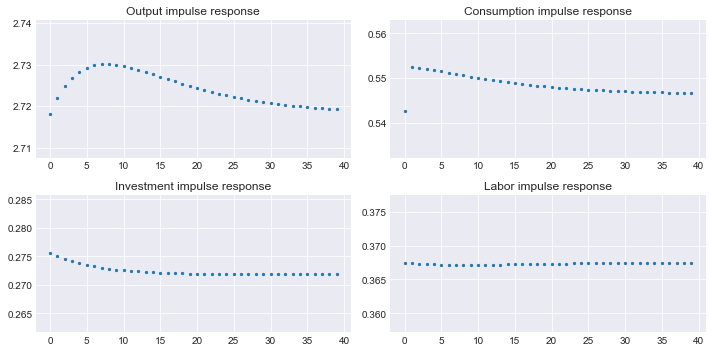

In [75]:
pylab.rcParams['figure.figsize'] = (10, 5)
plt.subplot(221)
plt.scatter(np.arange(0, 40), shock[3, :][0: 40], s = 5)
plt.title("Output impulse response")
plt.subplot(222)
plt.scatter(np.arange(0, 40), shock[5, :][0: 40], s = 5)
plt.title("Consumption impulse response")
plt.subplot(223)
plt.scatter(np.arange(0, 40), shock[4, :][0: 40], s = 5)
plt.title("Investment impulse response")
plt.subplot(224)
plt.scatter(np.arange(0, 40), shock[2, :][0: 40], s = 5)
plt.title("Labor impulse response")
plt.tight_layout()
plt.show()

### 2.10

In [76]:
# Set Parameters
nvec = np.array([1.0,1.0,0.2]) # labor supply
yrs_live = 60
s = 3
beta = 0.442
sigma = 3
alpha = 0.35
delta_annual = 0.05
delta = 1- ((1 - delta_annual) ** (yrs_live/s))
params = (nvec, beta, sigma, alpha)
nx = 2
ny = 0
nz = 1
zbar = np.array([0.])
guessk = np.array([.02, .04])

In [85]:
# get aggregate variables
def get_L(nvec): 
    L = nvec.sum()
    return L

def get_K(kvec): 
    K = kvec.sum()
    return K
#use characteristic eqs to get w and r
def get_w(K, L, z): 
    w = (1 - alpha) * np.exp(z) * ((K / L) ** alpha)
    return w

def get_r(K, L, z): 
    r = alpha * np.exp(z) * ((L / K) ** (1 - alpha)) - delta
    return r

def Model_olg(theta0, params):
    (k2pp, k3pp, k2p, k3p, k2, k3, zp, z) = theta0
    Kpp = get_K(np.array([k2pp, k3pp]))
    Kp = get_K(np.array([k2p, k3p]))
    K = get_K(np.array([k2, k3]))
    L = get_L(nvec)
    wp = get_w(Kp, L, zp)
    w = get_w(K, L, z)
    rp = get_r(Kp, L, zp)
    r = get_r(K, L, z)
    c1 = w * nvec[0] - k2p
    c2 = (1 + r) * k2 + w * nvec[1] - k3p
    c2p = (1 + rp) * k2p + wp * nvec[1] - k3pp
    c3p = (1 + rp) * k3p + wp * nvec[2]
    # errors
    E1 = c1 ** (-sigma) - beta * (1 + rp) * c2p ** (-sigma)
    E2 = c2 ** (-sigma) - beta * (1 + rp) * c3p ** (-sigma)
    
    return np.array([E1, E2])

In [88]:
# find the parameters matrices
[A, B, C, D, F, G, H, J, K, L, M] = LinApp_Deriv(Model_olg, params, theta0, nx, ny, nz, logX = True)

#normalize N   
N = 1

# find the policy and jump function coefficients
P, Q, U, R = LinApp_Solve(A,B,C,D,F,G,H,J,K,L,M,N,zbar,Sylv=0)

In [90]:
k2_initial = np.log(0.8 * k2bar) - np.log(k2bar)
k3_initial = np.log(1.1 * k3bar) - np.log(k3bar)

kmat = np.zeros((2, 20))
kmat[0, 0] = k2_initial
kmat[1, 0] = k3_initial

for i in range(1, 20):
    kmat[:, i] = np.dot(P, kmat[:, i-1]) 

kmat[0, :] = k2bar * np.exp(kmat[0, :]) 
kmat[1, :] = k3bar * np.exp(kmat[1, :]) 

k_agg = kmat[0, :] + kmat[1, :]

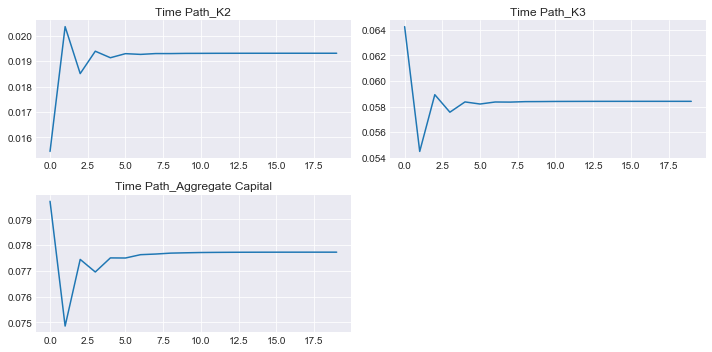

In [91]:
plt.subplot(221)
plt.plot(np.arange(0, 20), kmat[0, :])
plt.title('Time Path_K2')
plt.subplot(222)
plt.plot(np.arange(0, 20), kmat[1, :])
plt.title('Time Path_K3')
plt.subplot(223)
plt.plot(np.arange(0, 20), k_agg)
plt.title('Time Path_Aggregate Capital')
plt.tight_layout()
plt.show()

### 2.11

In [93]:
rhoz = 0.9 ** 20
sigmaz = 0.02

# find the derivatives matrices
[AA, BB, CC, DD, FF, GG, HH, JJ, KK, LL, MM ] = LinApp_Deriv(Model_olg, params, theta0, nx, ny, nz, logX = True)
print('F: ', FF)
print('G: ', GG)
print('H: ', HH)
print('L: ', LL)
print('M: ', MM)

# set value for NN    
NN = rhoz
    
# find the policy and jump function coefficients
PP, QQ, UU, RR  = LinApp_Solve(AA,BB,CC,DD,FF,GG,HH,JJ,KK,LL,MM,NN,zbar,Sylv=0)
print ('P:',PP)
print ('Q:', QQ)

F:  [[   0.         -137.73185791]
 [   0.            0.        ]]
G:  [[251.2494762  128.79794953]
 [-18.77382012 305.15817507]]
H:  [[ -47.53559541 -143.77234049]
 [-115.38715412  -37.38011659]]
L:  [[468.12086235]
 [200.17478582]]
M:  [[-546.59409199]
 [-405.73953902]]
P: [[0.03530495 0.63635142]
 [0.38029446 0.16164359]]
Q: [[1.84670944]
 [1.36346584]]


In [94]:
e = np.random.normal(0, scale=sigmaz, size=(10000, 251))
z = np.zeros_like(e)
z[:, 0] = np.zeros(10000)
for i in range(1, 251):
    z[:, i] = rhoz * z[:, i - 1] + e[:, i]

k2 = np.zeros_like(e)
k3 = np.zeros_like(e)
k_agg = np.zeros_like(e)
c = np.zeros_like(e)
y = np.zeros_like(e)
I = np.zeros_like(e)

for i in range(1, 251):
    k2[:, i] = PP[0, 0] * k2[:, i-1] + PP[0, 1] * k3[:, i-1] + QQ[0] * z[:, i]
    k3[:, i] = PP[1, 0] * k2[:, i-1] + PP[1, 1] * k3[:, i-1] + QQ[0] * z[:, i]
k2 = k2bar * np.exp(k2)
k3 = k3bar * np.exp(k3)
k_agg = k2 + k3

w = get_w(k_agg, 2.2, z)
r = get_r(k_agg, 2.2, z)

for i in range(250):
    y[:, i] = k_agg[:, i] ** alpha * 2.2 ** (1 - alpha) * np.exp(z[:, i])
    I[:, i] = k_agg[:, i + 1] - (1 - delta) * k_agg[:, i]
    c[:, i] = w[:, i] - k2[:, i + 1] + w[:, i] + (1 + r[:, i]) * k2[:, i] - k3[:, i+1] + w[:, i] * 0.2 + (1 + r[:,i]) * k3[:, i]

y = y[:, 0:250]
I = I[:, 0:250]
c = c[:, 0:250]

ymean = y.mean(axis=0)
cmean = c.mean(axis=0)
Imean = I.mean(axis=0)

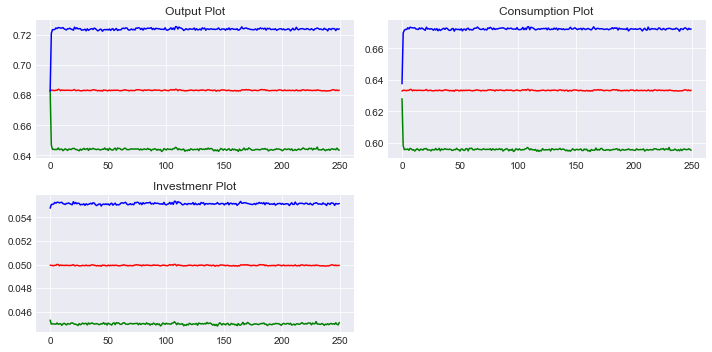

average output:  0.6832135901717891
average investment:  0.04992421338529809
average consumption:  0.6332893767864907


In [95]:
ymin = np.zeros(250)
ymax = np.zeros(250)
cmin = np.zeros(250)
cmax = np.zeros(250)
Imin = np.zeros(250)
Imax = np.zeros(250)

for i in range(250):
    ymin[i] = np.percentile(y[:, i], 5)
    ymax[i] = np.percentile(y[:, i], 95)
    cmin[i] = np.percentile(c[:, i], 5)
    cmax[i] = np.percentile(c[:, i], 95)
    Imin[i] = np.percentile(I[:, i], 5)
    Imax[i] = np.percentile(I[:, i], 95)
    

pylab.rcParams['figure.figsize'] = (10, 5)
plt.subplot(221)
plt.plot(np.arange(0, 250), ymean[0: 250], c='r')
plt.plot(np.arange(0, 250), ymin, c ='g')
plt.plot(np.arange(0, 250), ymax, c ='b')
plt.title("Output Plot")
plt.subplot(222)
plt.plot(np.arange(0, 250), cmean[0: 250], c='r')
plt.plot(np.arange(0, 250), cmin, c ='g')
plt.plot(np.arange(0, 250), cmax, c ='b')
plt.title("Consumption Plot")
plt.subplot(223)
plt.plot(np.arange(0, 250), Imean[0: 250], c='r')
plt.plot(np.arange(0, 250), Imin, c ='g')
plt.plot(np.arange(0, 250), Imax, c ='b')
plt.title("Investmenr Plot")
plt.tight_layout()
plt.show()
print("average output: " ,ymean.mean())
print("average investment: " ,Imean.mean())
print("average consumption: " ,cmean.mean())

## Exercise 3
### 3.2

In [1]:
import numpy as np
import scipy
from scipy import optimize as opt
from matplotlib import pyplot as plt

def LD(alpha, w, k, z):
    LD = k*((1-alpha)*z/w)**(1/alpha)
    return LD

def prof(alpha, w, k, z):
    pi = z*(k**alpha)*(LD(alpha, w, k, z))**(1-alpha) - w*LD(alpha, w, k, z)
    return pi

def LS(alpha, w, k, z, h, b, t):
    LS = h - b*(w*h + prof(alpha, w, k, z) - t)/(w*(1+b))
    return LS

def lab_err(w, lab_params):
    alpha, k, z, h, b, t = lab_params
    error = LS(alpha, w, k, z, h, b, t) - LD(alpha, w, k, z)
    return error

w_0 = 0.01
alpha_2 = 0.33
k_2 = 5
z_2 = 1
b_2 = 2
t_2 = 0.1
h_2 = 24
output = opt.fsolve(lab_err, w_0, [alpha_2, k_2, z_2, h_2, b_2, t_2], xtol=1e-8)
print("Market clearing wage: \t", output)

Market clearing wage: 	 [0.62736178]


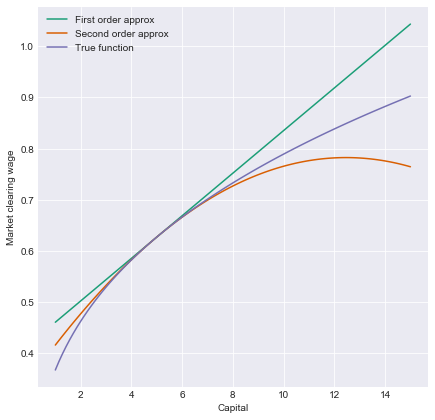

In [2]:
#First Order Approximation
def wage_finder_k(k):
    wage = opt.fsolve(lab_err, 0.1, [alpha_2, k, z_2, h_2, b_2, t_2], xtol=1e-8)
    return wage

def first_deriv(f, x, h = 1e-2):
    return (f(x + h)- f(x - h))/(2*h)
    
def second_deriv(f, x, h = 1e-2):
    return (f(x + h)+ f(x - h) - 2*f(x))/(h**2)

def first_approx(f, x0, x):
     return f(x0) + first_deriv(f, x0)*(x - x0) 
    
def second_approx(f, x0, x):
    return f(x0) + first_deriv(f, x0)*(x - x0) + 0.5* second_deriv(f,x0)*(x - x0) ** 2

kgrid = np.linspace(1, 15, 100)

fo_app = first_approx(wage_finder_k, 5, kgrid)
so_app = second_approx(wage_finder_k, 5, kgrid)
function = np.zeros(100)
for i in range(len(kgrid)):
    function[i] = wage_finder_k(kgrid[i])

plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(7, 7))
palette = plt.get_cmap('Dark2')

plt.plot(kgrid, fo_app, label='First order approx', color=palette(0))
plt.plot(kgrid, so_app, label='Second order approx', color=palette(1))
plt.plot(kgrid, function, label ='True function', color=palette(2))
plt.legend()
plt.xlabel('Capital')
plt.ylabel('Market clearing wage')

plt.show()


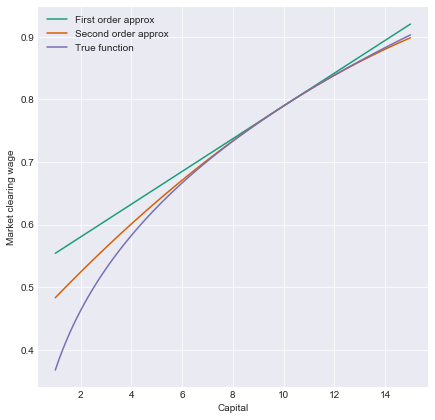

In [3]:
#Approximation K=10

kgrid = np.linspace(1, 15, 100)

fo_app = first_approx(wage_finder_k, 10, kgrid)
so_app = second_approx(wage_finder_k, 10, kgrid)
function = np.zeros(100)
for i in range(len(kgrid)):
    function[i] = wage_finder_k(kgrid[i])

plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(7, 7))
palette = plt.get_cmap('Dark2')

plt.plot(kgrid, fo_app, label='First order approx', color=palette(0))
plt.plot(kgrid, so_app, label='Second order approx', color=palette(1))
plt.plot(kgrid, function, label ='True function', color=palette(2))
plt.legend()
plt.xlabel('Capital')
plt.ylabel('Market clearing wage')

plt.show()

### 3.3

In [4]:
def F_err(y, x):
    F_err = (x**0.35 + 0.9*x - y)**(-2.5) - 0.95*(y**0.35 + 0.9*y)**(-2.5)
    return F_err

def first_deriv(f, x, h = 1e-2):
    return (f(x + h)- f(x - h))/(2*h)
    
def second_deriv(f, x, h = 1e-2):
    return (f(x + h)+ f(x - h) - 2*f(x))/(h**2)

def third_deriv(f, x, h = 1e-2):
    return (f(x + 2*h) - 2 * f(x + h) + 2 * f(x - h) - f(x - 2*h))/(2*(h**3))

def first_approx(f, x0, x):
     return f(x0) + first_deriv(f, x0)*(x - x0) 
    
def second_approx(f, x0, x):
    return f(x0) + first_deriv(f, x0)*(x - x0) + 0.5* second_deriv(f,x0)*(x - x0) ** 2

def third_approx(f, x0, x):
    return f(x0) + first_deriv(f, x0)*(x - x0) + 0.5* second_deriv(f,x0)*(x - x0) ** 2 + \
            1/6* third_deriv(f,x0)*(x - x0) ** 3

def y_finder(x):
    y = opt.fsolve(F_err, 50, x, xtol=1e-8)
    return y

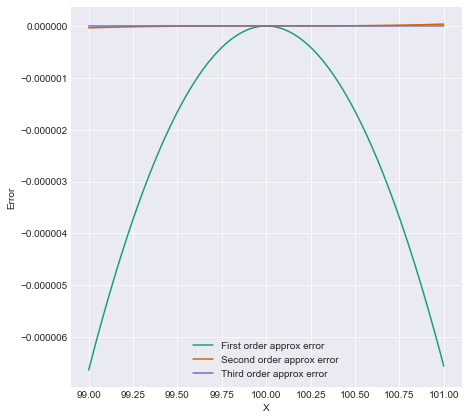

In [5]:
# Approximations
xgrid = np.linspace(99, 101, 100)

fo_app_x = first_approx(y_finder, 100, xgrid)
so_app_x = second_approx(y_finder, 100, xgrid)
tho_app_x = third_approx(y_finder, 100, xgrid)
function_x = np.zeros(100)
for i in range(len(xgrid)):
    function_x[i] = y_finder(xgrid[i])

fo_err = function_x - fo_app_x
so_err = function_x - so_app_x
tho_err = function_x - tho_app_x
    
plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(7, 7))
palette = plt.get_cmap('Dark2')

plt.plot(xgrid, fo_err, label='First order approx error', color=palette(0))
plt.plot(xgrid, so_err, label='Second order approx error', color=palette(1))
plt.plot(xgrid, tho_err, label ='Third order approx error', color=palette(2))
plt.legend()
plt.xlabel('X')
plt.ylabel('Error')

plt.show()

### 3.4

In [7]:
from sympy import symbols, diff
from sympy.utilities.lambdify import lambdify
import warnings

alpha = 0.35
beta = 0.98 
k = (alpha * beta) ** (1/(1 - alpha))
xu = 0.35

x, y, u, a, b = symbols('x y u a b')
f = 1/(u ** a - x) - b * a * x ** (a - 1)/(x ** a - y)
Fx = diff(f, x)
Fy = diff(f, y)
Fyy = diff(Fy, y)
Fyx = diff(Fy, x)
Fyu = diff(Fy, u)
Fxx = diff(Fx, x)
Fxu = diff(Fx, u)
Fuu = diff(diff(f, u), u)

Fx = lambdify((x, y, u, a, b), Fx, 'numpy')
Fy = lambdify((x, y, u, a, b), Fy, 'numpy')
Fyy = lambdify((x, y, u, a, b), Fyy, 'numpy')
Fxx = lambdify((x, y, u, a, b), Fxx, 'numpy')
Fyx = lambdify((x, y, u, a, b), Fyx, 'numpy')
Fyu = lambdify((x, y, u, a, b), Fyu, 'numpy')
Fxu = lambdify((x, y, u, a, b), Fxu, 'numpy')
Fuu = lambdify((x, y, u, a, b), Fuu, 'numpy')

Fx = Fx(k,k,k,alpha,beta)
Fy = Fy(k,k,k,alpha,beta)
Fyy = Fyy(k,k,k,alpha,beta)
Fyx = Fyx(k,k,k,alpha,beta)
Fxx = Fxx(k,k,k,alpha,beta)
Fyu = Fyu(k,k,k,alpha,beta)
Fxu = Fxu(k,k,k,alpha,beta)
Fuu = Fuu(k,k,k,alpha,beta)

xuu = -(Fyy*xu**4+2*Fyx*xu**3+2*Fyu*xu**2+Fxx*xu**2+2*Fxu*xu+Fuu)/(Fy*xu**2+Fy*xu+Fx)
print('x_uu: ',xuu)

x_uu:  -1.1800856355648073


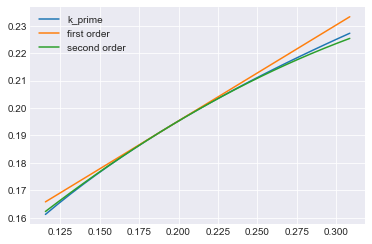

In [8]:
kgrid = np.linspace(0.6*k, 1.6*k, 25)
k1 = alpha * beta * kgrid ** alpha
k2 = np.zeros(25)
k3 = np.zeros(25)
for i in range(25):
    k2[i] = k + xu * (kgrid[i] - k)
    k3[i] = k + xu * (kgrid[i] - k) + (1/2) * xuu * (kgrid[i] - k) ** 2
plt.plot(kgrid, k1, label='k_prime')
plt.plot(kgrid, k2, label='first order')
plt.plot(kgrid, k3, label = 'second order')
plt.legend()
plt.show()

### 3.5

In [100]:
alpha = 0.35
beta = 0.98
rho = 0.95
sigma = 0.02
kbar = (alpha * beta) ** (1/(1 - alpha))
zbar = 0

# Solve for F, G, H, L, M numerically
def Lin_SS(k2=kbar, k1=kbar, k=kbar, z1=zbar, z=zbar):
    SS = (alpha * beta * np.exp(z1) * k1 ** (alpha - 1) * (np.exp(z) * k ** alpha - k1))/(np.exp(z1) * k1 ** alpha - k2)-1
    return SS

e = 0.001

F = (Lin_SS(k2=kbar+e) - Lin_SS(k2=kbar-e))/(2 * e)
G = (Lin_SS(k1=kbar+e) - Lin_SS(k1=kbar-e))/(2 * e)
H = (Lin_SS(k=kbar+e) - Lin_SS(k=kbar-e))/(2 * e)   
L = (Lin_SS(z1=zbar+e) - Lin_SS(z1=zbar-e))/(2 * e)
M = (Lin_SS(z=zbar+e) - Lin_SS(z=zbar-e))/(2 * e)
N = 0.95
Gamma_A = np.array([F, G, H, L, M])

Hx = (-G - np.sqrt(G ** 2 - 4 * F * H))/(2 * F)
Hz = -(L * N + M)/(F * N + F * Hx + G)
print("H_x is:",Hx)
print("H_z is:",Hz)

H_x is: 0.3499868890614378
H_z is: 0.1927711735724865


In [11]:
# Calculate Fs
Fs = np.zeros((5, 3))
Fs[0, 0] = Hx * Hx
Fs[0, 1] = Hx * Hz + Hz * N
Fs[1, 0] = Hx
Fs[1, 1] = Hz
Fs[2, 0] = 1
Fs[3, 1] = N
Fs[4, 1] = 1

# Calculate gamma_AA
Gamma_AA = np.zeros((5, 5))

keys = ['k2', 'k1', 'k', 'z1', 'z']
values = [kbar, kbar, kbar, zbar, zbar]

for i in range(5):
    for j in range(5):
        if i == j:
            L =dict(zip(keys, values))
            L[keys[i]] = values[i] + e
            
            J = dict(zip(keys, values))
            J[keys[i]] = values[i] - e
            K = dict(zip(keys, values))
            Gamma_AA[i, i] = (Lin_SS(**L) - 2 * Lin_SS(**K)+ Lin_SS(**J))/(e ** 2)
        else:
            G = dict(zip(keys, values))
            G[keys[i]] = values[i] + e
            G[keys[j]] = values[j] + e
            
            E = dict(zip(keys, values))
            E[keys[i]] = values[i] - e
            E[keys[j]] = values[j] + e
            
            R = dict(zip(keys, values))
            R[keys[i]] = values[i] + e
            R[keys[j]] = values[j] - e
            
            P = dict(zip(keys, values))
            P[keys[i]] = values[i] - e
            P[keys[j]] = values[j] - e
            
            Gamma_AA[i, j] = (Lin_SS(**G)-Lin_SS(**E)-Lin_SS(**R)+Lin_SS(**P))/(4 * e ** 2)

Lambda = np.dot(np.dot(np.kron(Fs.T, np.identity(1)), (Gamma_AA)), Fs)
Lambda[2,2] = Hz * Gamma_AA[0,0] * Hz
print(Gamma_AA)
print(Lambda)

[[ 14.66746051 -31.43312921   7.48343421  -5.53579765   4.12191243]
 [-31.43312921 105.31275749 -16.95380951   6.05970275  -9.33824181]
 [  7.48343421 -16.95380951  -9.31718106  -1.44266686   2.76335677]
 [ -5.53579765   6.05970275  -1.44266686   1.06718515  -0.79462801]
 [  4.12191243  -9.33824181   2.76335677  -0.79462801   1.52207014]]
[[-8.92627019  2.66348982  0.        ]
 [ 2.66348982  0.82231848  0.        ]
 [ 0.          0.          0.54505347]]


In [13]:
def Fss(soln):
    '''soln = np.array([Hxx, Hxz, Hzz, Hvv])'''
    Fss = np.zeros((15,3))
    Fss[0,:] = np.array([soln[0]*Hx*Hx + Hx*soln[0], soln[0]*Hx*Hz + Hx*soln[1] + soln[1]*Hx*N, 0])
    Fss[1,:] = np.array([soln[0], soln[1], 0])
    Fss[5,:] = np.array([soln[0]*Hx*Hz + Hx*soln[1] + soln[1]*Hx*N, soln[1]*N*Hz + Hx*soln[2] + soln[2]*N*N, 0])
    Fss[6,:] = np.array([soln[1], soln[2], 0])
    Fss[10,:] = np.array([0, 0, Hx*soln[3] + soln[3]])
    Fss[11,:] = np.array([0, 0, soln[3]])
    
    error = Lambda + np.dot(np.kron(np.identity(3), Gamma_A), Fss)
    return np.array([error[0, 0], error[0, 1], error[1, 0], error[1, 1]])

theta_guess = np.zeros(4) + 0.2
Hxx, Hxz, Hzz, Hvv = opt.fsolve(Fss, theta_guess)
print("H_xx is:",Hxx)
print("H_xz is:",Hxz)
print("H_zz is:",Hzz)
print("H_vv is:",Hvv)

H_xx is: -1.1801174956329012
H_xz is: 0.3499364954301506
H_zz is: 0.18267603442221453
H_vv is: 0.3876000522492759


In [24]:
#AR1 Approximation from Debacker
def rouwen(rho, mu, step, num):
    '''
    Adapted from Lu Zhang and Karen Kopecky. Python by Ben Tengelsen.
    Construct transition probability matrix for discretizing an AR(1)
    process. This procedure is from Rouwenhorst (1995), which works
    well for very persistent processes.
    INPUTS:
    rho  - persistence (close to one)
    mu   - mean and the middle point of the discrete state space
    step - step size of the even-spaced grid
    num  - number of grid points on the discretized process
    OUTPUT:
    dscSp  - discrete state space (num by 1 vector)
    transP - transition probability matrix over the grid
    '''

    # discrete state space
    dscSp = np.linspace(mu - (num - 1) / 2 * step, mu + (num - 1) / 2 * step,
                        num).T

    # transition probability matrix
    q = p = (rho + 1)/2.
    transP = np.array([[p**2, p*(1-q), (1-q)**2],
                      [2*p*(1-p), p*q+(1-p)*(1-q), 2*q*(1-q)],
                      [(1-p)**2, (1-p)*q, q**2]]).T

    while transP.shape[0] <= num - 1:

        # see Rouwenhorst 1995
        len_P = transP.shape[0]
        transP = p*np.vstack((np.hstack((transP, np.zeros((len_P, 1)))), np.zeros((1, len_P+1)))) \
        + (1 - p)*np.vstack((np.hstack((np.zeros((len_P, 1)), transP)), np.zeros((1, len_P+1)))) \
        + (1 - q)*np.vstack((np.zeros((1, len_P+1)), np.hstack((transP, np.zeros((len_P, 1)))))) \
        + q * np.vstack((np.zeros((1, len_P+1)), np.hstack((np.zeros((len_P, 1)), transP))))

        transP[1:-1] /= 2.

    # ensure columns sum to 1
    if np.max(np.abs(np.sum(transP, axis=1) - np.ones(transP.shape))) >= 1e-12:
        print('Problem in rouwen routine!')
        return None
    else:
        return transP.T, dscSp

Text(0.5,0,'Policy Function')

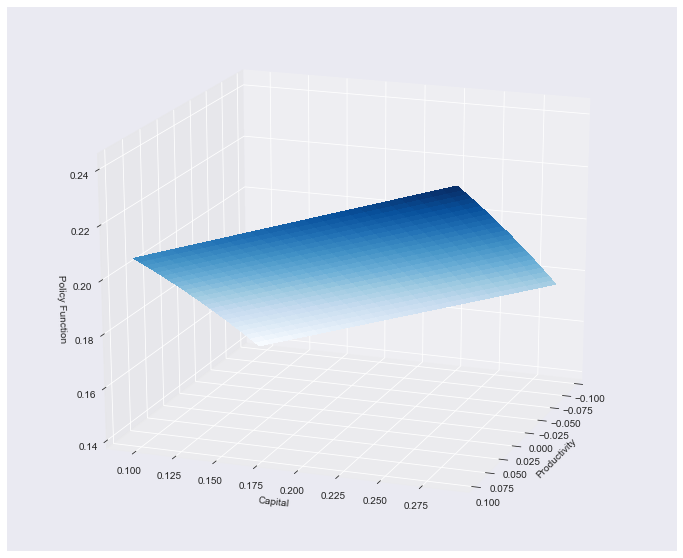

In [28]:
# Plot policy funciton
# K grid
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
k_lb = 0.5 * kbar
k_ub = 1.5 * kbar
kgrid = np.linspace(k_lb, k_ub, 25)
sizek = len(kgrid)

# z grid
step = 10 * sigma/25
pi, zgrid = rouwen(rho, 0, step, 25)
sizez = len(zgrid)

optk = np.zeros((sizek, sizez))
for i in range(sizek):
    optk[i,:] = Hx * (kgrid[i] - kbar) + Hz * (zgrid - 0) + (1/2) * (Hxx * (kgrid[i] - kbar) ** 2 + Hzz * (zgrid[i] - zbar) ** 2 +2 * Hxz * (kgrid[i] - kbar) * (zgrid[i] - zbar)) + kbar

fig = plt.figure(figsize=(12, 10))
zmat, kmat = np.meshgrid(kgrid, zgrid)
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(kmat, zmat, optk, rstride=1, cstride=1, cmap=cm.Blues,
                linewidth=0, antialiased=False)
ax.view_init(elev=20., azim=20)  # to rotate plot for better view
ax.set_xlabel(r'Productivity')
ax.set_ylabel(r'Capital')
ax.set_zlabel(r'Policy Function')